# ABOVE AC9 Data Processing  

## Checking Sample Replicates by comparing filtered and raw

**Authors:** Catherine Kuhn, Elena Terzić and Anna Simpson

**Last Updated:** September 19th, 2018

### Import libraries

In [2]:
### Import the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import glob
import os
import sys
import csv
from scipy import interpolate
from os import listdir
from os.path import isfile, join
import matplotlib.gridspec as gridspec
import inspect

### Functions

** Accepts a dictionary where the keys are the rep names (to be displayed on the legend), with the sample type (filtered or raw) as the first part of a space-separated string (which might also include rep number and/or date) and the entries are the file paths to the data to be plotted OR a pandas dataframe**

(this is so that linestyle type can be changed based on whether the sample is filtered or raw)

Example entry in dictionary: 'fil 2 091718': filepath
Another example: 'fil': pandas dataframe

## Inputs

In [3]:
from fopt_toolkit import fopt_toolkit as fp
for i in inspect.getmembers(fp, inspect.isfunction):
    print(i[0])

get_id
make_dir
plotting_multiple_files


In [4]:
figures_cleaned_2_filepath = fp.make_dir('Figures/Check_compared_reps')

### Upload metadata file with filepaths

In [5]:
metadata_updated = pd.read_csv('../Metadata/project_metadata_updated.csv', dtype={'Date': object, 'Rep':object}, skiprows=0, delimiter= '\t')

Samples for most sites were taken on one date, but some were taken on multiple dates. In which case there may be multiple 'rep 1's or 'rep 2's for the same site. The following code creates a list 'need_date' which specifies the sites where 'date' should be included to distinguish multiple reps.

In [6]:
## Creates a pandas 'series' object where the index is sites 
##and the data is the number of unique dates associated with that site
group = metadata_updated[metadata_updated['Sample_Type']!='cal'].groupby('Site')
df2 = group.apply(lambda x: len(x['Date'].unique()))

## Checks if a site has more than one unique date associated with it
## and if so, adds it to the 'need_date' list
need_date = []
for i in df2.index:
    if df2[i] > 1:
        need_date.append(i)
need_date

[]

#### Create an empty nested dictionary to store file paths in the correct organization for plotting. Keys are site names. Entries are nested dictionaries: level 1 is attenuation or absorption, level 2 is keys: rep names (including date where applicable) and entries: file paths. Sites where there are only calibration measurements are excluded.

In [7]:
x = {}
for j in set(metadata_updated[metadata_updated['Sample_Type']!='cal']['Site']):
    x[j] = {'a':{}, 'c':{}}

#### Filling the dictionary with rep names and file paths.

In [8]:
## Iterate through the metadata dataframe; two ways to call: the row in general or the index
for index, row in metadata_updated.iterrows():
    ## Only include files/reps that passed manual removal
    if row['Pass_Manual_Removal'] == 'pass':
        ## Do not include 'calibration' samples (at least for now)
        if row['Sample_Type'] == 'cal':
            continue
        else:
            site = row['Site']
            analysis_type = row['Analysis_Type']
            filepath = row['Summary_file_path_cleaned_MANUAL']
            ## Define rep name by checking if this site has multiple dates
            if site in need_date:
                ## if so, include date in repname
                repname = row['Sample_Type']+' '+row['Rep']+' '+row['Date']
            else:
                repname = row['Sample_Type']+' '+row['Rep']
            ## Once rep name is established, create new dictionary entry
            ## with rep name as key and filepath as entry
            x[site][analysis_type][repname] = filepath

#### Plotting

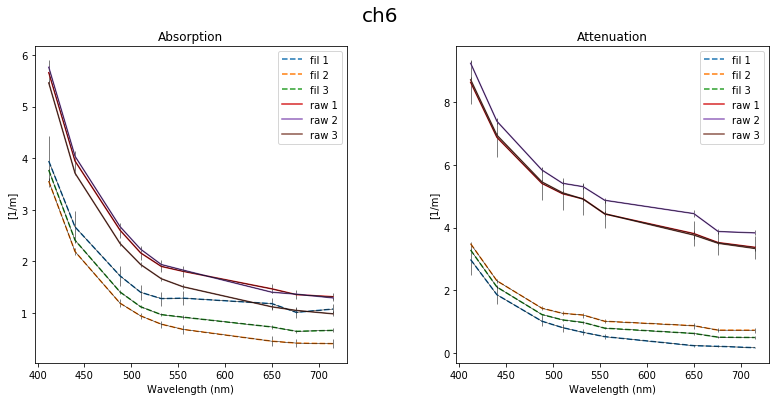

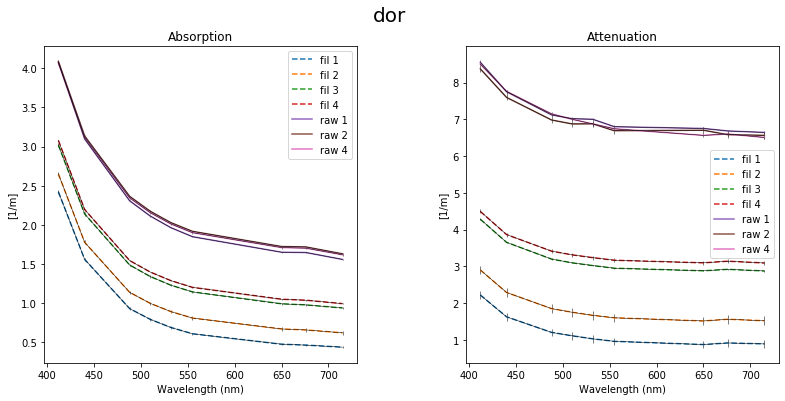

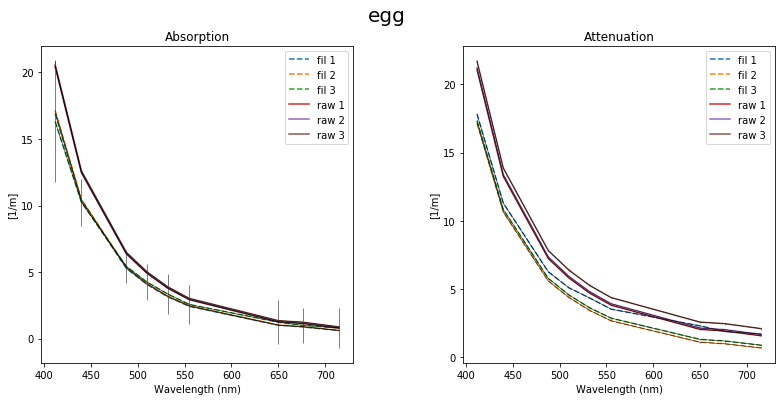

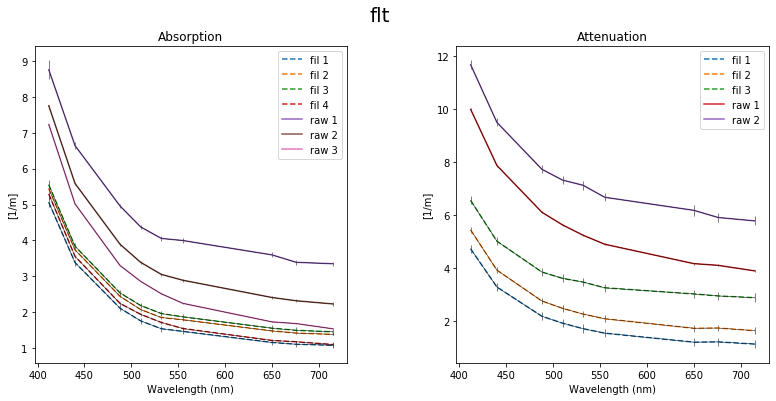

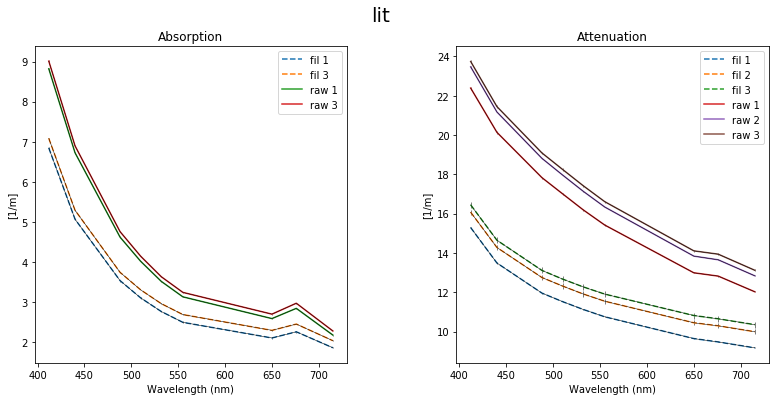

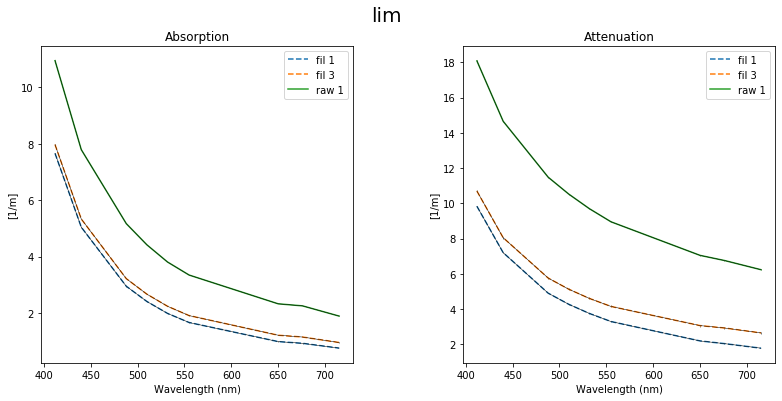

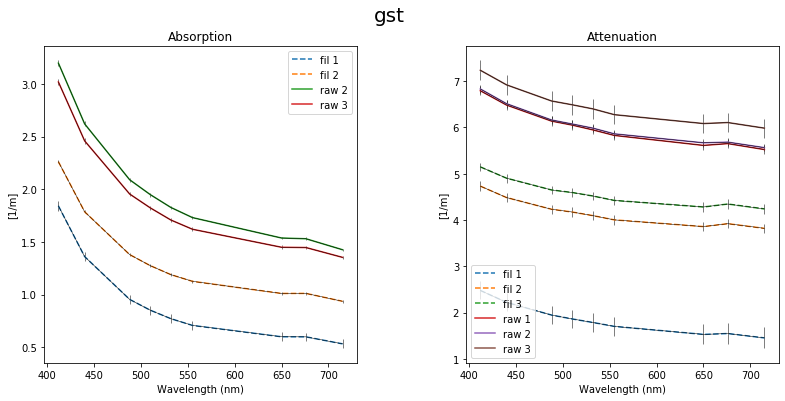

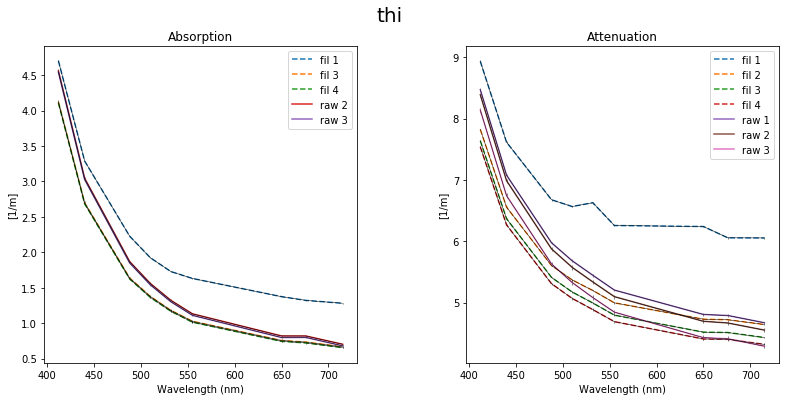

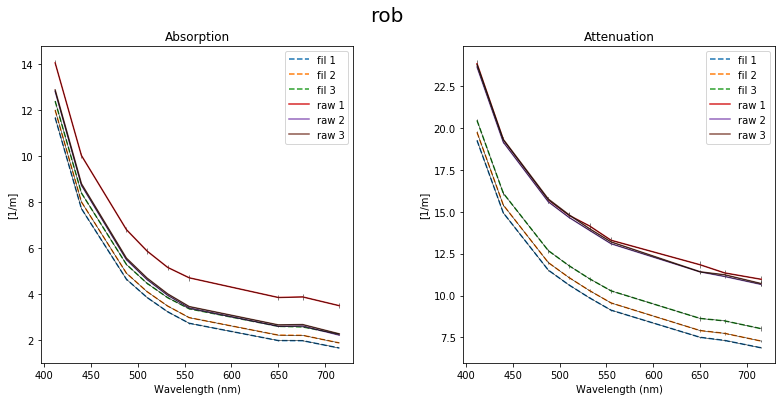

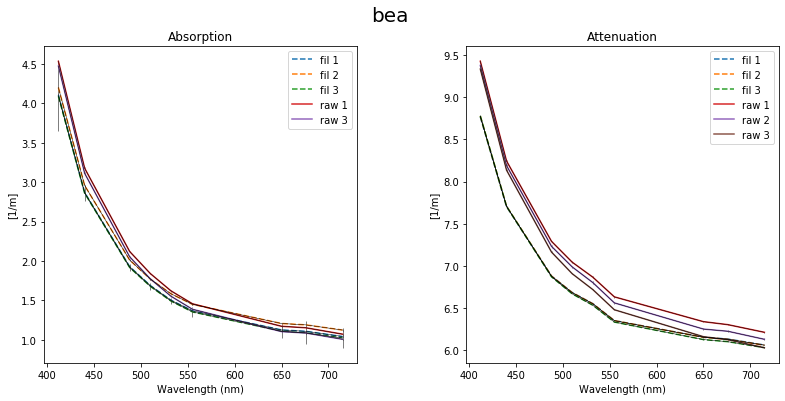

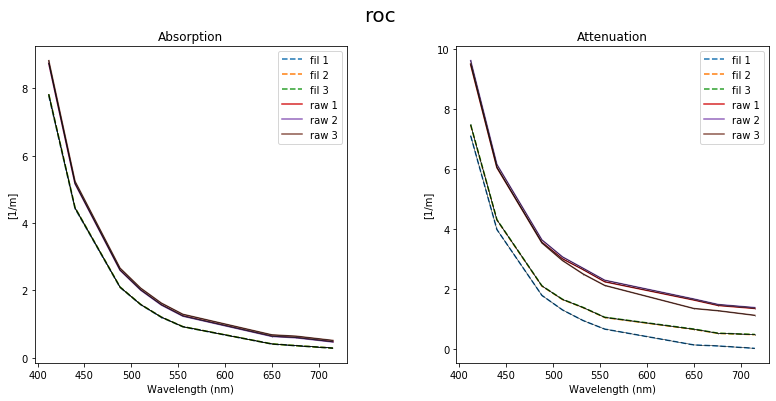

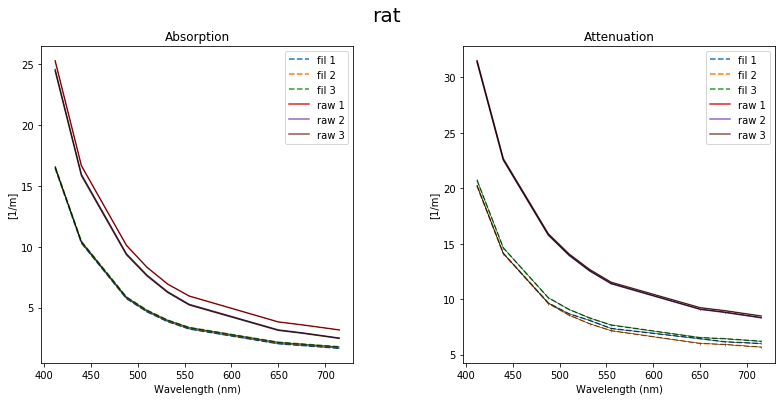

In [9]:
## Iterate through dictionary
for i in x:
    ## Get filepaths for each site for absorption and attenuation
    absorption = x[i]['a']
    attenuation = x[i]['c']
    ## Set up subplots
    plt.subplots(1, 2, figsize=(12, 5.5))
    plt.subplot(1, 2, 1)
    absorption_graph = fp.plotting_multiple_files(absorption, title='Absorption')
    plt.subplot(1, 2, 2)
    attenuation_graph = fp.plotting_multiple_files(attenuation, title='Attenuation')
    plt.subplots_adjust(top=0.88, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.suptitle(i, fontsize=20)
    plt.savefig(figures_cleaned_2_filepath+'/'+i+'.png', bbox_inches='tight')
    plt.show()

## Also separately graph multiple dates for sites with samples taken on multiple dates

** Initialize dictionary **

In [10]:
dict_for_sites_with_multiple_dates = {}
for j in need_date:
    for k in set(metadata_updated[metadata_updated['Site']==j]['Date']):
        dict_for_sites_with_multiple_dates[j+'_'+k] = {'a':{}, 'c':{}}

** Fill dictionary for plotting **

In [11]:
## Iterate through the metadata dataframe; two ways to call: the row in general or the index
for index, row in metadata_updated.iterrows():
    sitedate = row['Site']+'_'+row['Date']
    ## This is only for sites in our new dictionary
    if sitedate not in dict_for_sites_with_multiple_dates:
        continue
    ## Only include files/reps that passed manual removal
    if row['Pass_Manual_Removal'] == 'pass':
        ## Do not include 'calibration' samples (at least for now)
        if row['Sample_Type'] == 'cal':
            continue
        else:
            analysis_type = row['Analysis_Type']
            filepath = row['Summary_file_path_cleaned_MANUAL']
            repname = row['Sample_Type']+' '+row['Rep']
            ## Once rep name is established, create new dictionary entry
            ## with rep name as key and filepath as entry
            dict_for_sites_with_multiple_dates[sitedate][analysis_type][repname] = filepath

** Plotting **

In [12]:
for i in sorted(dict_for_sites_with_multiple_dates):
    absorption = dict_for_sites_with_multiple_dates[i]['a']
    attenuation = dict_for_sites_with_multiple_dates[i]['c']
    plt.subplots(1, 2, figsize=(12, 5.5))
    plt.subplot(1, 2, 1)
    absorption_graph = fp.plotting_multiple_files(absorption, title='Absorption')
    plt.subplot(1, 2, 2)
    attenuation_graph = fp.plotting_multiple_files(attenuation, title='Attenuation')
    plt.subplots_adjust(top=0.88, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.suptitle(i, fontsize=20)
    #plt.savefig(figures_cleaned_2_filepath+'/'+i+'.png', bbox_inches='tight')
    plt.show()

## Removing further samples after comparisons (placeholder)

Define list of samples to remove by their ID; for now, list is empty. Use ft.get_id to get sample ids.

In [20]:
r1 = fp.get_id('thi','c', 'fil','1'); r1

Site thi
Analysis_Type c
Sample_Type fil
Rep 1


['AC9_072019_thi_fil_c_1_T19_3']

In [22]:
r2 = fp.get_id('bea','a','fil','2'); r2

Site bea
Analysis_Type a
Sample_Type fil
Rep 2


['AC9_072019_bea_fil_a_2_T17_7']

In [24]:
samples_to_remove = r1+r2

New column in metadata df for pass/fail second removal step. Copy manual removal column and then replace passes with fails for samples in the samples_to_remove list.

In [25]:
metadata_updated['Pass_Second_Removal'] = metadata_updated['Pass_Manual_Removal']
for i in samples_to_remove:
    metadata_updated.loc[metadata_updated.ID == i, 'Pass_Second_Removal'] = 'fail'

Location to store files that passed second removal step:

In [26]:
cleaned_2_filepath = fp.make_dir('Data/3.2_cor_summary_stats_cleaned_2')

New column for file paths for samples that passed second round of removal

In [27]:
metadata_updated['Summary_file_path_cleaned_SECOND'] = None

Copy second round passed files to new directory, record filepath in new column

In [28]:
## Iterate through the filepaths from the first manual removal step
for i in metadata_updated['Summary_file_path_cleaned_MANUAL']:
    ## If the sample passed the second removal step
    if metadata_updated.loc[metadata_updated.Summary_file_path_cleaned_MANUAL == i, 'Pass_Second_Removal'].max() == 'pass':
        ## Create the new filepath for storing the file in the directory for files that passed both steps
        new_path = cleaned_2_filepath+'/'+i.split('/')[-1]
        ## Copy the file to the new directory
        my_command = ' '.join(['cp',i,new_path])
        os.system(my_command)
        ## Store the filepath in the new metadata column
        metadata_updated.loc[metadata_updated.Summary_file_path_cleaned_MANUAL == i, 'Summary_file_path_cleaned_SECOND'] = new_path
    else:
        ## If the sample didn't pass, entry is 'None'. Actually can probably delete this...
        metadata_updated.loc[metadata_updated.Summary_file_path_cleaned_MANUAL == i, 'Summary_file_path_cleaned_SECOND'] = None

Update metadata file with second round pass/fails and filepaths of passed files

In [29]:
metadata_updated.to_csv('../Metadata/project_metadata_updated.csv', sep='\t',index=False)